In [32]:
!pip install kaggle

In [33]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [34]:
%cd .kaggle
!ls

/content/.kaggle
kaggle.json


In [0]:
import json
token = {"username":"rishabh100","key":"68e2e3c6f843929e40ced284f39e941a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [36]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [37]:
%cd ..

/content


In [38]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [40]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-04-25 00:03:33          59645  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            458  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           6189  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             57  
doaaalsenani/usa-cers-dataset                               US C

In [41]:
!ls

Alcoholics.zip	sample_data  SMNI_CMI_TEST  SMNI_CMI_TRAIN


In [42]:
!kaggle datasets download -d nnair25/Alcoholics -p /content

Alcoholics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
file_name = "Alcoholics.zip"

In [0]:
from zipfile import ZipFile


In [45]:
with ZipFile(file_name, 'r') as zipf: 
    zipf.printdir() 
    print('Extracting all the files now...') 
    zipf.extractall() 
    print('Done!') 

File Name                                             Modified             Size
SMNI_CMI_TEST/Data1.csv                        2019-09-20 23:06:22       929723
SMNI_CMI_TEST/Data10.csv                       2019-09-20 23:06:24       930179
SMNI_CMI_TEST/Data100.csv                      2019-09-20 23:06:24       928464
SMNI_CMI_TEST/Data101.csv                      2019-09-20 23:06:26      1045391
SMNI_CMI_TEST/Data102.csv                      2019-09-20 23:06:28      1043753
SMNI_CMI_TEST/Data103.csv                      2019-09-20 23:06:28       965222
SMNI_CMI_TEST/Data104.csv                      2019-09-20 23:06:30      1047920
SMNI_CMI_TEST/Data105.csv                      2019-09-20 23:06:30       965789
SMNI_CMI_TEST/Data106.csv                      2019-09-20 23:06:30      1043848
SMNI_CMI_TEST/Data107.csv                      2019-09-20 23:06:32      1049820
SMNI_CMI_TEST/Data108.csv                      2019-09-20 23:06:32       964327
SMNI_CMI_TEST/Data109.csv               

In [0]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from google.colab  import files
from zipfile import ZipFile
import pandas as pd
import glob
import random

In [0]:
path =r'/content/SMNI_CMI_TRAIN/'

filenames = glob.glob(path + "/*.csv")

dfs = []

for filename in filenames:

    dfs.append(pd.read_csv(filename))



Train_data = pd.concat(dfs, ignore_index=True)



In [0]:
train = pd.DataFrame(Train_data)


In [49]:
train.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,14,FP1,0,9.430,a,S1 obj,0,co2a0000375,0.000000
1,6,14,FP1,1,6.500,a,S1 obj,0,co2a0000375,0.003906
2,7,14,FP1,2,3.571,a,S1 obj,0,co2a0000375,0.007812
3,8,14,FP1,3,1.617,a,S1 obj,0,co2a0000375,0.011719
4,9,14,FP1,4,1.617,a,S1 obj,0,co2a0000375,0.015625


In [50]:
print(train)

         Unnamed: 0  trial number  ...         name      time
0                 5            14  ...  co2a0000375  0.000000
1                 6            14  ...  co2a0000375  0.003906
2                 7            14  ...  co2a0000375  0.007812
3                 8            14  ...  co2a0000375  0.011719
4                 9            14  ...  co2a0000375  0.015625
...             ...           ...  ...          ...       ...
7667707       16447            37  ...  co2a0000371  0.980469
7667708       16448            37  ...  co2a0000371  0.984375
7667709       16449            37  ...  co2a0000371  0.988281
7667710       16450            37  ...  co2a0000371  0.992188
7667711       16451            37  ...  co2a0000371  0.996094

[7667712 rows x 10 columns]


In [0]:
EEG_data = train.drop(['Unnamed: 0'], axis=1)
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch'

In [0]:
EEG_data.loc[EEG_data['sensor position'] == 'AF1', 'sensor position'] = 'AF3'
EEG_data.loc[EEG_data['sensor position'] == 'AF2', 'sensor position'] = 'AF4'
EEG_data.loc[EEG_data['sensor position'] == 'PO1', 'sensor position'] = 'PO3'
EEG_data.loc[EEG_data['sensor position'] == 'PO2', 'sensor position'] = 'PO4'
## remove rows with undefined positions
EEG_data = EEG_data[(EEG_data['sensor position'] != 'X') & (EEG_data['sensor position'] != 'Y') & (EEG_data['sensor position'] != 'nd')]

In [0]:
def sample_data(stimulus, random_id=random.randint(0,7)):
    """Function merged data frame - one data frame for randomly selected subject from control group and 
    one data frame for randomly selected subject from alcoholic group"""
    ## random choose the name_id of subject from alcoholic/control group
    alcoholic_id = EEG_data['name'][(EEG_data['subject identifier'] == 'a') & 
                                    (EEG_data['matching condition'] == stimulus)].unique()[random_id]
    control_id = EEG_data['name'][(EEG_data['subject identifier'] == 'c') & 
                                  (EEG_data['matching condition'] == stimulus)].unique()[random_id]
    
    ## get min trial numbers for each group
    alcoholic_trial_number = EEG_data['trial number'][(EEG_data['name'] == alcoholic_id) & (EEG_data['matching condition'] == stimulus)].min()
    control_trial_number = EEG_data['trial number'][(EEG_data['name'] == control_id) & (EEG_data['matching condition'] == stimulus)].min()

    ## filter the EEG DF
    alcoholic_df = EEG_data[(EEG_data['name'] == alcoholic_id) & (EEG_data['trial number'] == alcoholic_trial_number)]
    control_df = EEG_data[(EEG_data['name'] == control_id) & (EEG_data['trial number'] == control_trial_number)]
    
    return alcoholic_df.append(control_df)

In [0]:
sensor_positions = EEG_data[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['sensor position']
channels = EEG_data[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['channel']

def plot_3dSurface_and_heatmap(stimulus, group, df):
    
    if group == 'c':
        group_name = 'Control'
    else:
        group_name = 'Alcoholic'
        
    temp_df = pd.pivot_table(df[['channel', 'sample num', 'sensor value']][(df['subject identifier'] == group) & (df['matching condition'] == stimulus)],
                                          index='channel', columns='sample num', values='sensor value').values.tolist()
    data = [go.Surface(z=temp_df, colorscale='Bluered')]

    layout = go.Layout(
        title='<br>3d Surface and Heatmap of Sensor Values for ' + stimulus + ' Stimulus for ' + group_name + ' Group',
        width=800,
        height=900,
        autosize=False,
        margin=dict(t=0, b=0, l=0, r=0),
        scene=dict(
            xaxis=dict(
                title='Time (sample num)',
                gridcolor='rgb(255, 255, 255)',
    #             erolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='Channel',
                tickvals=channels,
                ticktext=sensor_positions,
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230, 230)'
            ),
            zaxis=dict(
                title='Sensor Value',
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            aspectratio = dict(x=1, y=1, z=0.5),
            aspectmode = 'manual'
        )
    )

    updatemenus=list([
        dict(
            buttons=list([   
                dict(
                    args=['type', 'surface'],
                    label='3D Surface',
                    method='restyle'
                ),
                dict(
                    args=['type', 'heatmap'],
                    label='Heatmap',
                    method='restyle'
                )             
            ]),
            direction = 'left',
            pad = {'r': 10, 't': 10},
            showactive = True,
            type = 'buttons',
            x = 0.1,
            xanchor = 'left',
            y = 1.1,
            yanchor = 'top' 
        ),
    ])

    annotations = list([
        dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
    ])
    layout['updatemenus'] = updatemenus
    layout['annotations'] = annotations

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [0]:
stimulus = 'S1 obj'
S1_sample_df = sample_data(stimulus=stimulus, random_id=1)

In [0]:
stimulus = 'S2 match'
S2_m_sample_df = sample_data(stimulus=stimulus, random_id=1)

In [0]:
stimulus = 'S2 nomatch'
S2_nm_sample_df = sample_data(stimulus=stimulus, random_id= 1)

In [0]:


sample_corr_df = pd.pivot_table(S2_nm_sample_df[S2_nm_sample_df['subject identifier'] == 'a'], values='sensor value', index='sample num', columns='sensor position').corr()

list_of_pairs = []
j = 0
for column in sample_corr_df.columns:
    j += 1
    for i in range(j, len(sample_corr_df)):
        if column != sample_corr_df.index[i]:
            temp_pair = [column + '-' + sample_corr_df.index[i]]
            list_of_pairs.append(temp_pair)

In [0]:
def get_correlated_pairs_sample(threshold, correlation_df, group):
    ## create dictionary wheke keys are the pairs and values are the amount of high correlation pair
    corr_pairs_dict = {}
    for i in range(len(list_of_pairs)):
        temp_corr_pair = dict(zip(list_of_pairs[i], [0]))
        corr_pairs_dict.update(temp_corr_pair)

    j = 0
    for column in correlation_df.columns:
        j += 1
        for i in range(j, len(correlation_df)):
            if ((correlation_df[column][i] >= threshold) & (column != correlation_df.index[i])):
                corr_pairs_dict[column + '-' + correlation_df.index[i]] += 1

    corr_count = pd.DataFrame(corr_pairs_dict, index=['count']).T.reset_index(drop=False).rename(columns={'index': 'channel_pair'})
    print('Channel pairs that have correlation value >= ' + str(threshold) + ' (' + group + ' group):')
    print(corr_count['channel_pair'][corr_count['count'] > 0].tolist())

In [0]:
def plot_sensors_correlation(df, threshold_value):
    """Funtion plots the the correlation plots between sensor positions for each group"""
    correlations_alcoholic = pd.pivot_table(df[df['subject identifier'] == 'a'], 
                                          values='sensor value', index='sample num', columns='sensor position').corr()

    correlations_control = pd.pivot_table(df[df['subject identifier'] == 'c'], 
                                          values='sensor value', index='sample num', columns='sensor position').corr()

    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(121)
    ax.set_title('Alcoholic group', fontsize=14)
    mask = np.zeros_like(correlations_alcoholic, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlations_alcoholic, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    ax = fig.add_subplot(122)
    ax.set_title('Control group', fontsize=14)
    mask = np.zeros_like(correlations_control, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlations_control, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.suptitle('Correlation between Sensor Positions for ' + df['matching condition'].unique()[0] + ' stimulus', fontsize=16)
    plt.show()
    get_correlated_pairs_sample(threshold=threshold_value, correlation_df=correlations_alcoholic, group='Alcoholic')
    print('\n')
    get_correlated_pairs_sample(threshold=threshold_value, correlation_df=correlations_control, group='Control')

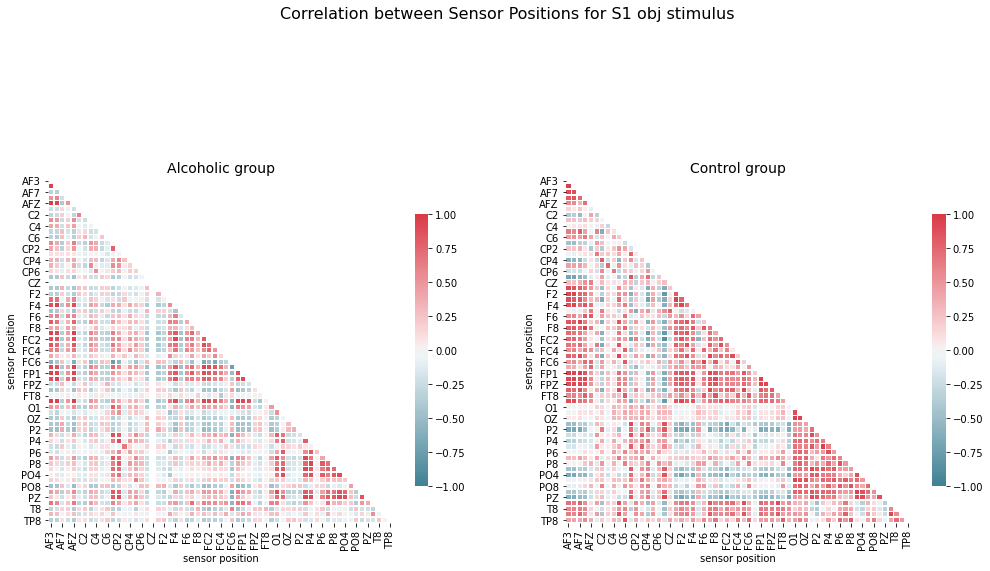

Channel pairs that have correlation value >= 0.97 (Alcoholic group):
['AF3-AFZ', 'AFZ-FZ']


Channel pairs that have correlation value >= 0.97 (Control group):
['AF3-AF4']


In [61]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

plot_sensors_correlation(df=S1_sample_df, threshold_value=.97)

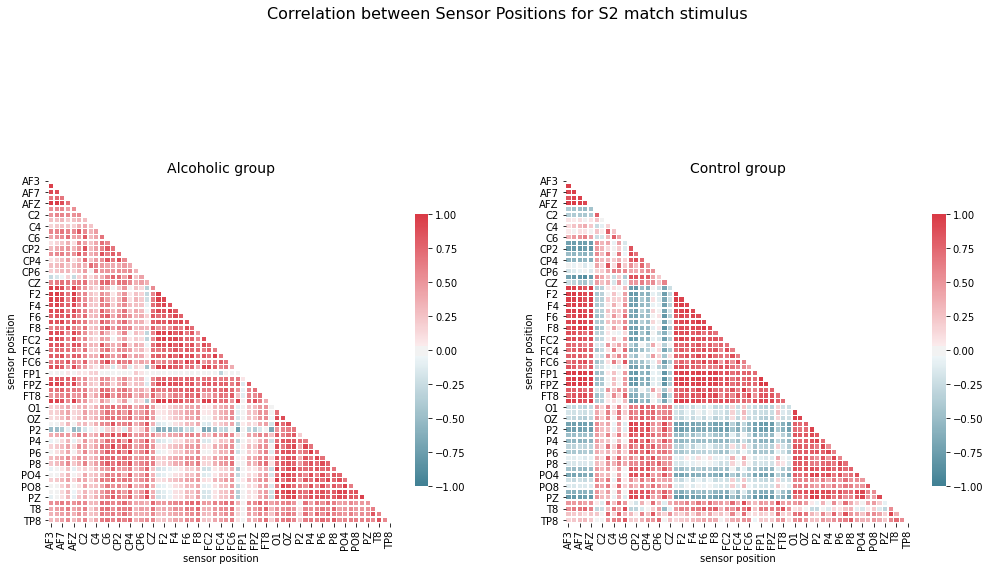

Channel pairs that have correlation value >= 0.97 (Alcoholic group):
['AF3-AFZ', 'AF4-AFZ', 'AF4-F2', 'AFZ-F2', 'F1-F3', 'F1-FZ', 'F2-FZ', 'P4-P6']


Channel pairs that have correlation value >= 0.97 (Control group):
['AF3-AF4', 'AF3-AFZ', 'AF3-F1', 'AF3-F3', 'AF3-FZ', 'AF4-AF7', 'AF4-AFZ', 'AF4-F2', 'AF4-FP1', 'AF4-FP2', 'AF4-FPZ', 'AF7-AFZ', 'AF7-FP1', 'AF7-FP2', 'AF7-FPZ', 'AF8-F6', 'AF8-F8', 'AFZ-F1', 'AFZ-F2', 'AFZ-F3', 'AFZ-FP1', 'AFZ-FP2', 'AFZ-FPZ', 'F1-F3', 'F1-FZ', 'F2-F4', 'F2-FZ', 'F3-F5', 'F5-F7', 'F6-F8', 'FC5-FT7', 'FP1-FP2', 'FP1-FPZ', 'FP2-FPZ', 'P1-PZ']


In [62]:
plot_sensors_correlation(df=S2_m_sample_df, threshold_value=.97)

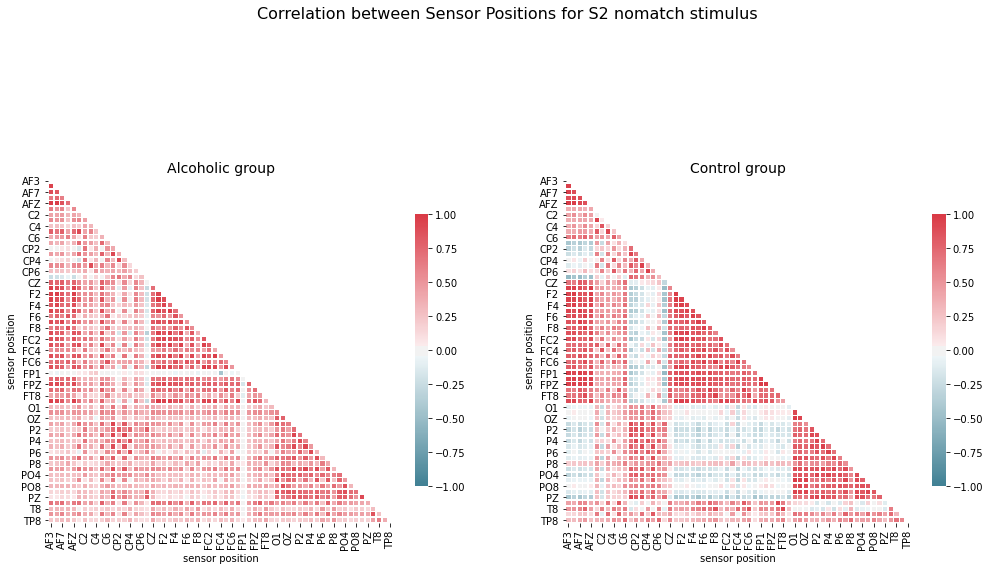

Channel pairs that have correlation value >= 0.97 (Alcoholic group):
['AF3-AFZ', 'AF4-AFZ', 'F1-F3', 'F1-FZ', 'F3-F5', 'FC3-FC5']


Channel pairs that have correlation value >= 0.97 (Control group):
['AF3-AFZ', 'AF4-AFZ', 'AF4-F2', 'AF7-FP1', 'F1-F2', 'F1-F3', 'F1-FZ', 'F4-F6', 'F8-FC6', 'FP1-FPZ', 'FP2-FPZ', 'O1-OZ', 'O1-PO7']


In [63]:
plot_sensors_correlation(df=S2_nm_sample_df, threshold_value=.97)

In [0]:
def get_correlated_pairs(stimulus, threshold, group):
    """Funtion returns the df which holds pairs of channel with high correlation for stimulus, group and threshold provided"""
    corr_pairs_dict = {}
    trial_numbers_list = EEG_data['trial number'][(EEG_data['subject identifier'] == group) & (EEG_data['matching condition'] == stimulus)].unique()
    ## create dictionary wheke keys are the pairs and values are the amount of high correlation pair
    for i in range(len(list_of_pairs)):
        temp_corr_pair = dict(zip(list_of_pairs[i], [0]))
        corr_pairs_dict.update(temp_corr_pair)

    for trial_number in trial_numbers_list:    
        correlation_df = pd.pivot_table(EEG_data[(EEG_data['subject identifier'] == group) & (EEG_data['trial number'] == trial_number)], 
                                        values='sensor value', index='sample num', columns='sensor position').corr()

        j = 0 ## by setting the j we are going just through values below the main diagonal
        for column in correlation_df.columns:
            j += 1
            for i in range(j, len(correlation_df)):
                if ((correlation_df[column][i] >= threshold) & (column != correlation_df.index[i])):
                    corr_pairs_dict[column + '-' + correlation_df.index[i]] += 1

    corr_count = pd.DataFrame(corr_pairs_dict, index=['count']).T.reset_index(drop=False).rename(columns={'index': 'channel_pair'})
    corr_count['group'] = group
    corr_count['stimulus'] = stimulus
    return(corr_count)

In [0]:
def compare_corr_pairs(stimulus):
    """Function creates bar chart with the ratio of correlated pairs for both groups"""
    top_control_df = corr_pairs_df[(corr_pairs_df['group'] == 'c') & (corr_pairs_df['stimulus'] == stimulus)]
    top_alcoholic_df = corr_pairs_df[(corr_pairs_df['group'] == 'a') & (corr_pairs_df['stimulus'] == stimulus)]
    top_control_pairs = top_control_df.sort_values('count', ascending=False)['channel_pair'][:20]
    top_alcoholic_pairs = top_alcoholic_df.sort_values('count', ascending=False)['channel_pair'][:20]

    merged_df = pd.DataFrame({'channel_pair': top_control_pairs.append(top_alcoholic_pairs).unique()})
    merged_df = merged_df.merge(top_control_df[['channel_pair', 'count', 'trials_count']],
                                on='channel_pair', how='left').rename(columns={'count':'count_control', 'trials_count': 'trials_count_c'})
    merged_df = merged_df.merge(top_alcoholic_df[['channel_pair', 'count', 'trials_count']],
                                on='channel_pair', how='left').rename(columns={'count':'count_alcoholic', 'trials_count': 'trials_count_a'})

    data_1 = go.Bar(x=merged_df['channel_pair'],
                    y=(merged_df['count_alcoholic']/merged_df['trials_count_a']).apply(lambda x: round(x,2)),
                    text=merged_df['count_alcoholic'],
                    name='Alcoholic Group',
                    marker=dict(color='rgb(20,140,45)'))
    data_2 = go.Bar(x=merged_df['channel_pair'],
                    y=(merged_df['count_control']/merged_df['trials_count_c']).apply(lambda x: round(x,2)),
                    text=merged_df['count_control'],
                    name='Control Group',
                    marker=dict(color='rgb(200,100,45)'))

    layout = go.Layout(title='Amount of Correlated Pairs for the whole Data Set (' + stimulus + ' stimulus)',
                       xaxis=dict(title='Channel Pairs'),
                       yaxis=dict(title='Ratio'),
                       barmode='group')

    data = [data_1, data_2]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


In [0]:
corr_pairs_df = pd.DataFrame({})
stimuli_list = ['S1 obj', 'S2 match', 'S2 nomatch']
## create df that holds information of total trial amount for each subject by stimulus
size_df = EEG_data.groupby(['subject identifier', 'matching condition'])[['trial number']].nunique().reset_index(drop=False).rename(columns={'trial number':'trials_count'})

for stimulus in stimuli_list:
    corr_pairs_df = corr_pairs_df.append(get_correlated_pairs(stimulus=stimulus, threshold=.9, group='c'))
    corr_pairs_df = corr_pairs_df.append(get_correlated_pairs(stimulus=stimulus, threshold=.9, group='a'))
corr_pairs_df = corr_pairs_df.merge(size_df, left_on=['group', 'stimulus'], right_on=['subject identifier', 'matching condition'], how='left')

In [67]:
compare_corr_pairs(stimulus='S1 obj')

In [68]:
compare_corr_pairs(stimulus='S2 match')

In [69]:
compare_corr_pairs(stimulus='S2 nomatch')

In [0]:
testfile=[]
# testfile=(pd.read_csv('/content/SMNI_CMI_TEST/Test/Data283.csv'))
# uploaded = files.upload()
testfile = pd.read_csv('/content/SMNI_CMI_TEST/Data279.csv')

In [0]:
Test_file = pd.DataFrame(testfile)
Test_file = Test_file.drop(['Unnamed: 0'], axis=1)

In [331]:
print(Test_file['subject identifier'],Test_file['matching condition'])

0        c
1        c
2        c
3        c
4        c
        ..
16379    c
16380    c
16381    c
16382    c
16383    c
Name: subject identifier, Length: 16384, dtype: object 0        S2 nomatch,
1        S2 nomatch,
2        S2 nomatch,
3        S2 nomatch,
4        S2 nomatch,
            ...     
16379    S2 nomatch,
16380    S2 nomatch,
16381    S2 nomatch,
16382    S2 nomatch,
16383    S2 nomatch,
Name: matching condition, Length: 16384, dtype: object


In [0]:
a=len(Test_file.index)

In [0]:
FP1 = Test_file.loc[Test_file["sensor position"] == "FP1"]['sensor value']
FP2 = Test_file.loc[Test_file["sensor position"] == "FP2"]['sensor value']
FPZ = Test_file.loc[Test_file["sensor position"] == "FPZ"]['sensor value']
a = FP1.mean()
b = FP2.mean()
c = FPZ.mean()

In [323]:
print(a,b,c)

0.6904687499999995 -0.42469140625000107 -3.722503906250002


In [324]:
ratio = (a/b)
print(ratio)

ratio1 = b/c
print(ratio1)

-1.6258128604409399
0.11408756496855613


In [325]:
if ratio and ratio1 > 0:
  print('non-alcoholic') 
else:
    print('alcoholic')

non-alcoholic
